# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning"

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning


/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.metrics.NPLM import candidate_sigma
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_bisection_np ,compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/5D_mixture/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2025-02-27 11:12:36.929477: Importing os...
2025-02-27 11:12:36.929699: Importing sys...
Visible devices: [0]
2025-02-27 11:12:36.929937: Importing timer from timeit...
2025-02-27 11:12:36.930006: Setting env variables for tf import (only device(s) [0] will be available)...
2025-02-27 11:12:36.930134: Importing numpy...
2025-02-27 11:12:37.029761: Importing matplotlib...
2025-02-27 11:12:37.382581: Importing h5py...
2025-02-27 11:12:37.416922: Importing importlib.util...
2025-02-27 11:12:37.417024: Importing json...
2025-02-27 11:12:37.417086: Importing pandas...
2025-02-27 11:12:37.858137: Importing random...
2025-02-27 11:12:37.858276: Importing scipy utils...
2025-02-27 11:12:38.334621: Importing subprocess...
2025-02-27 11:12:38.334802: Importing tensorflow...
Tensorflow version: 2.16.1
2025-02-27 11:12:41.763749: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2025-02-27 11:12:42.740762: Importing timeit...
2025-02-27 11:12:42.740853: Importing tqdm...
2

/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2025-02-27 11:12:48.418206: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2025-02-27 11:12:48.434797: All done.


# Model definition

In [3]:
seed = 0
ncomp = 3
ndims = 5
niter = 20
dist_1 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
dist_2 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'> <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)
sample from dist_1:  tf.Tensor(
[[-1.21344303  3.79128235 -0.36013196 -4.40885725 -0.9766748 ]
 [ 1.79642973  0.74689922 -1.4338443  -1.6379499   2.47373712]], shape=(2, 5), dtype=float64)
sample from dist_2:  tf.Tensor(
[[-1.21344303  3.79128235 -0.36013196 -4.40885725 -0.9766748 ]
 [ 1.79642973  0.74689922 -1.4338443  -1.6379499   2.47373712]], shape=(2, 5), dtype=float64)


# Fixed $n=m=50000$

## Null hypothesis

### Model definition

In [4]:
batch_size_test = 50000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K_NPLM_Par/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
    
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = False,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Generating dist_1_num and dist_2_num with tensorflow function.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.


I0000 00:00:1740651170.592698 1448627 service.cc:145] XLA service 0xb9005e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740651170.592745 1448627 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0


Setting dist_num from dist_symb.
nsamples 1000000
batch_size 50000
niter 20
niter * batch_size 1000000
small_sample True


I0000 00:00:1740651181.110065 1448627 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [7]:
flk_sigma = candidate_sigma(dist_1, perc = 90)     # you have to insert the fraction of the 90th percentile of the pairwise distribution you 
                                                   # desire by hand

Known distribution case. The distribution is the costum made MixMultiNormal.

The gaussian kernel sigma is estimated as 1/2.5 of the 90th percentile of the pairwise distance among 10000 points extracted from the reference distribution.
The value of sigma is: 3.88
The 2.5 value has been chosen looking at the pairwise distribution in 5D.
If you want you can change its value in metrics.NPLM.


In [33]:
lam_list = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                      progress_bar = True,
                                      verbose = True,
                                      M = 3000, 
                                      lam = lam, 
                                      iter_list = 1000000,
                                      flk_sigma = flk_sigma,
                                      weight = 1)
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")

print(nplm_objects)
    

lam value for NPLMMetric_0 is: 1e-06
lam value for NPLMMetric_1 is: 1e-07
lam value for NPLMMetric_2 is: 1e-08
lam value for NPLMMetric_3 is: 1e-09
lam value for NPLMMetric_4 is: 1e-10
lam value for NPLMMetric_5 is: 1e-11
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97ac0cad50>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f9778064710>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f9868817990>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f9868831ed0>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98442d1150>, 'NPLMMetric_5': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97ac235050>}


## Test Lambda Values at number of Nyström centers fixed

In [34]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"lambda_times_{test_name}.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        lam_list = [entry["lambda"] for entry in results]
        lam_list = np.array(lam_list)
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])

        for i in range(len(lam_list)):
            print(f"For test '{test_name}' and lambda = {lam_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(lam_list), niter))
        null_hp_times[test_name] = np.zeros(len(lam_list))  

        for i in range(len(lam_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  
            results.append({"lambda": lam_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/lambda_times_test0.json already exists. Loading existing results for test0...
For test 'test0' and lambda = 1e-06, the null hypothesis for 20 points has been calculated in 47.20589388301596 s.
For test 'test0' and lambda = 1e-07, the null hypothesis for 20 points has been calculated in 65.84196624881588 s.
For test 'test0' and lambda = 1e-08, the null hypothesis for 20 points has been calculated in 81.83264581509866 s.
For test 'test0' and lambda = 1e-09, the null hypothesis for 20 points has been calculated in 108.55592891899869 s.
For test 'test0' and lambda = 1e-10, the null hypothesis for 20 points has been calculated in 175.43158006086014 s.
For test 'test0' and lambda = 1e-11, the null hypothesis for 20 points has been calculated in 401.7977415169589 s.


[ 2.36029469  3.29209831  4.09163229  5.42779645  8.771579   20.08988708]


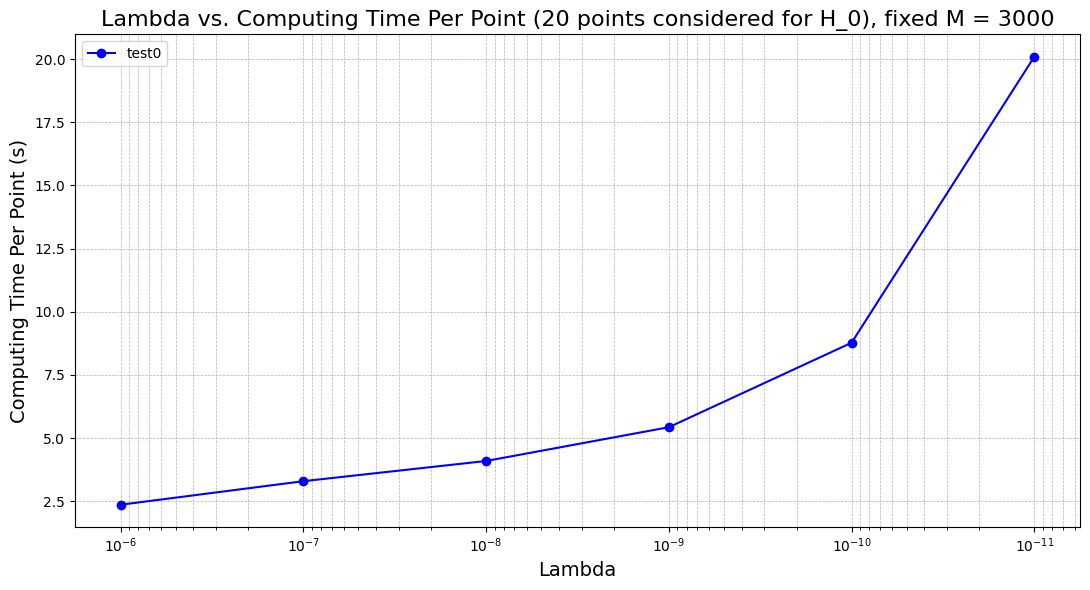

In [35]:
null_hp_times_per_point = {}
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']
color_list = ['b']
label_list = ['test0']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(lam_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xscale('log')  
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"Lambda vs. Computing Time Per Point ({niter} points considered for H_0), fixed M = 3000", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.savefig(null_hypotheses_dir+"Lambda_times_M=3000.pdf", format="pdf")
plt.show()



# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(lam_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xscale('log')  
# plt.xlabel("Lambda", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"Lambda vs. Average Computing Time Per Point ({niter} points considered for H_0) over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.gca().invert_xaxis()

# plt.show()

#test for different sample sizes, add test statistic values, try to test higher M values  

## Test number of Nyström centers at lambda fixed 

In [36]:
M_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

nplm_objects_for_M = {}

for i, M_value in enumerate(M_list):
    nplm_objects_for_M[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                            progress_bar = True,
                                            verbose = True,
                                            M = M_value, 
                                            lam = 1e-9, 
                                            iter_list = 1000000,
                                            flk_sigma = flk_sigma,
                                            weight = 1)
    print(f"M value for NPLMMetric_{i} is: {nplm_objects_for_M[f'NPLMMetric_{i}'].nplm_kwargs.get('M')}")

print(nplm_objects_for_M)
    

M value for NPLMMetric_0 is: 1000
M value for NPLMMetric_1 is: 2000
M value for NPLMMetric_2 is: 3000
M value for NPLMMetric_3 is: 4000
M value for NPLMMetric_4 is: 5000
M value for NPLMMetric_5 is: 6000
M value for NPLMMetric_6 is: 7000
M value for NPLMMetric_7 is: 8000
M value for NPLMMetric_8 is: 9000
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98442c1950>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97f22f8290>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98688cfc90>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98688e2b90>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97f22e5450>, 'NPLMMetric_5': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f99e2b078d0>, 'NPLMMetric_6': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97f22e7750>, 'NPLMMetric_7': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97f22a1710>, 'NPLMMetric_8': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98441b23d0>}


In [37]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"M_times_{test_name}.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        M_list = [entry["M"] for entry in results]
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])
                
        for i in range(len(M_list)):
            print(f"For test '{test_name}' and M = {M_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(M_list), niter))
        null_hp_times[test_name] = np.zeros(len(M_list))  

        for i in range(len(M_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects_for_M[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects_for_M[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  # Save the time for this lambda
            results.append({"M": M_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/M_times_test0.json already exists. Loading existing results for test0...
For test 'test0' and M = 1000, the null hypothesis for 20 points has been calculated in 196.65366441383958 s.
For test 'test0' and M = 2000, the null hypothesis for 20 points has been calculated in 133.88305560988374 s.
For test 'test0' and M = 3000, the null hypothesis for 20 points has been calculated in 103.04777381918393 s.
For test 'test0' and M = 4000, the null hypothesis for 20 points has been calculated in 88.81486314698122 s.
For test 'test0' and M = 5000, the null hypothesis for 20 points has been calculated in 89.76358047290705 s.
For test 'test0' and M = 6000, the null hypothesis for 20 points has been calculated in 92.78049580194056 s.
For test 'test0' and M = 7000, the null hypothesis for 20 points has been calculated in 96.79582607187331 s.
For test 'test0' and M = 8000, the null hypothesis for 20 points has been calculated in 100.1135620849672

[9.83268322 6.69415278 5.15238869 4.44074316 4.48817902 4.63902479
 4.8397913  5.0056781  5.35702705]


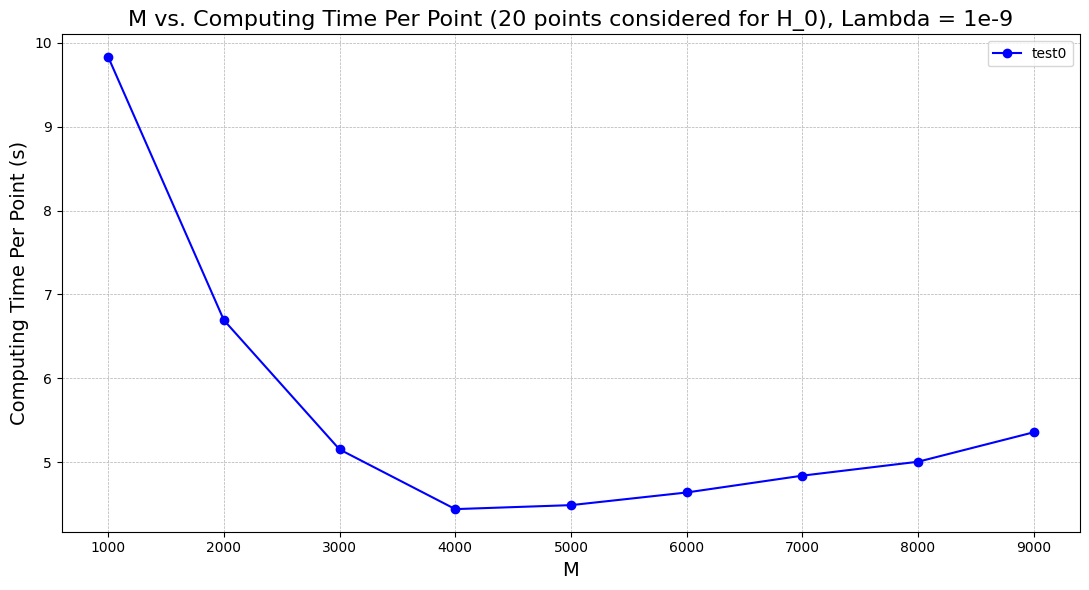

In [38]:
null_hp_times_per_point = {}
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']

color_list = ['b']
label_list = ['test0']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(M_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"M vs. Computing Time Per Point ({niter} points considered for H_0), Lambda = 1e-9", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"M_times_lambda=1e-9.pdf", format="pdf")
plt.show()


# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(M_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xlabel("M", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"M vs. Average Computing Time Per Point ({niter} points considered for H_0) for Lambda = 1e-9 over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.show()

## Test Statistic fluctuations at varying Lambda and M 

Test0 -> Average test statistic value for lambda = 1e-9 varying M: [578.4138746596229, 582.2599564618979, 583.0491555884388, 583.339672118406, 583.5144384787897, 583.6388753793387, 583.6897691694198, 583.7454792056244, 583.7824787756314]
 with std: [53.18014624995856, 52.96414599270138, 52.917287987640215, 52.895487255027554, 52.894473642511684, 52.90032371927579, 52.91226552234343, 52.91242918469038, 52.91527316052328]


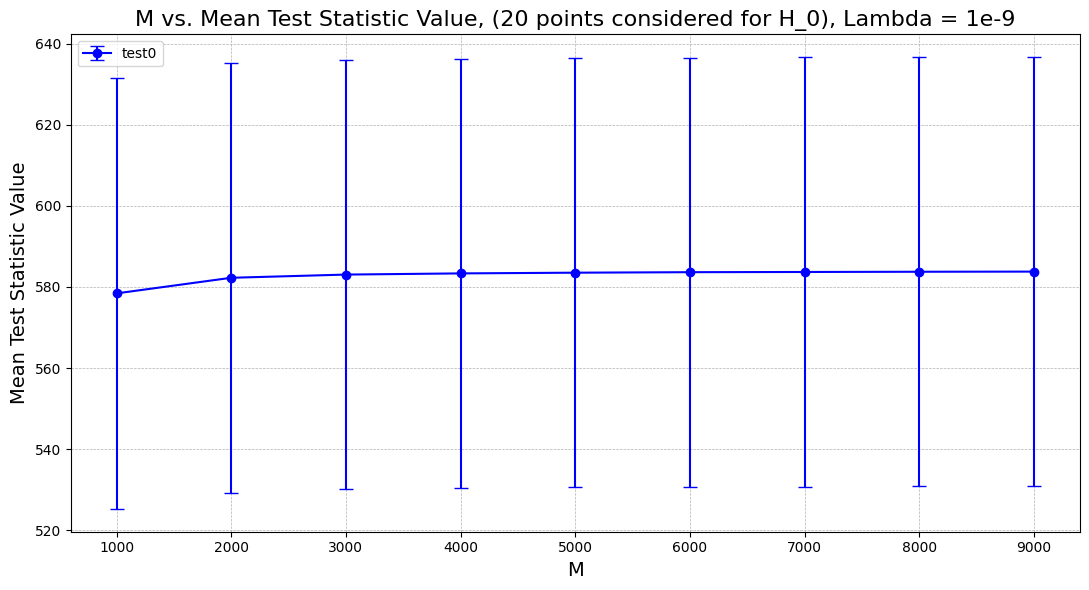

In [39]:
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']

color_list = ['b']
label_list = ['test0']

avg_test_stat = {}
std_test_stat = {}

for test_name in test_names:
    avg_test_stat[test_name] = []
    std_test_stat[test_name] = []
    for i, m in enumerate(M_list):
        avg_test_stat[test_name].append(np.mean(metric_values[test_name][i]))
        std_test_stat[test_name].append(np.std(metric_values[test_name][i]))
    print(f"{test_name.capitalize()} -> Average test statistic value for lambda = 1e-9 varying M: {avg_test_stat[test_name]}\n"
          f" with std: {std_test_stat[test_name]}")

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.errorbar(M_list, avg_test_stat[test_name], std_test_stat[test_name], capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Mean Test Statistic Value", fontsize=14)
plt.title(f"M vs. Mean Test Statistic Value, ({niter} points considered for H_0), Lambda = 1e-9", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"Test_statistic_fluctuations_for_lambda=1e-9.pdf", format="pdf")
plt.show()



# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(M_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xlabel("M", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"M vs. Average Computing Time Per Point ({niter} points considered for H_0) for Lambda = 1e-9 over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.show()


## Final Test to choose parameters 

In [40]:
M_threshold_1 = 9*1e8/(ndims*batch_size_test)  
M_threshold_2 = 9*1e8/(ndims*batch_size_test*2)  
print(M_threshold_1, M_threshold_2)

# Ci sarà il *2, non ci sarà il *2? Chissà

3600.0 1800.0


To understand what happens with the times at varying M numbers look at the documentation: https://falkonml.github.io/falkon/api_reference/options.html#falkon.options.FalkonOptions, search for min_cuda_iter_size_64 (if you are working with float 64. If instead you worlk with float 32 search min_cuda_iter_size_32). 

Given that we are working with float 64 we have that:
if     M x ndims x sample_size(*2?) < 9 x 10^8, the computation will run on the CPU, otherwise it will use GPU. 
That's why you see sometimes the times being higher at lower M numbers, arrive to a minimum and then growing again: you pass from CPU to GPU. 
The idea is to fix the M_value around the minimum (a bit on the right side of it to have better precision but mantain good computational time performance) 
and vary lambda to see where it starts growing drastically. 

## Testing Lambda with optimal M


M = 6000

In [41]:
lam_list = [1e-6, 1e-7, 1e-8, 1e-9]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                      progress_bar = True,
                                      verbose = True,
                                      M = 6000, 
                                      lam = lam, 
                                      iter_list = 1000000,
                                      flk_sigma = flk_sigma,
                                      weight = 1)
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")

print(nplm_objects)
    

lam value for NPLMMetric_0 is: 1e-06
lam value for NPLMMetric_1 is: 1e-07
lam value for NPLMMetric_2 is: 1e-08
lam value for NPLMMetric_3 is: 1e-09
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97780c5110>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97ac105d90>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f9844248e10>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98442e0290>}


In [42]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"lambda_times_at_M_6000_{test_name}.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        lam_list = [entry["lambda"] for entry in results]
        lam_list = np.array(lam_list)
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])

        for i in range(len(lam_list)):
            print(f"For test '{test_name}' and lambda = {lam_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(lam_list), niter))
        null_hp_times[test_name] = np.zeros(len(lam_list))  

        for i in range(len(lam_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  
            results.append({"lambda": lam_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/lambda_times_at_M_6000_test0.json already exists. Loading existing results for test0...
For test 'test0' and lambda = 1e-06, the null hypothesis for 20 points has been calculated in 27.947389329085127 s.
For test 'test0' and lambda = 1e-07, the null hypothesis for 20 points has been calculated in 30.092058091191575 s.
For test 'test0' and lambda = 1e-08, the null hypothesis for 20 points has been calculated in 39.110379606019706 s.
For test 'test0' and lambda = 1e-09, the null hypothesis for 20 points has been calculated in 55.88497007009573 s.


[1.39736947 1.5046029  1.95551898 2.7942485 ]


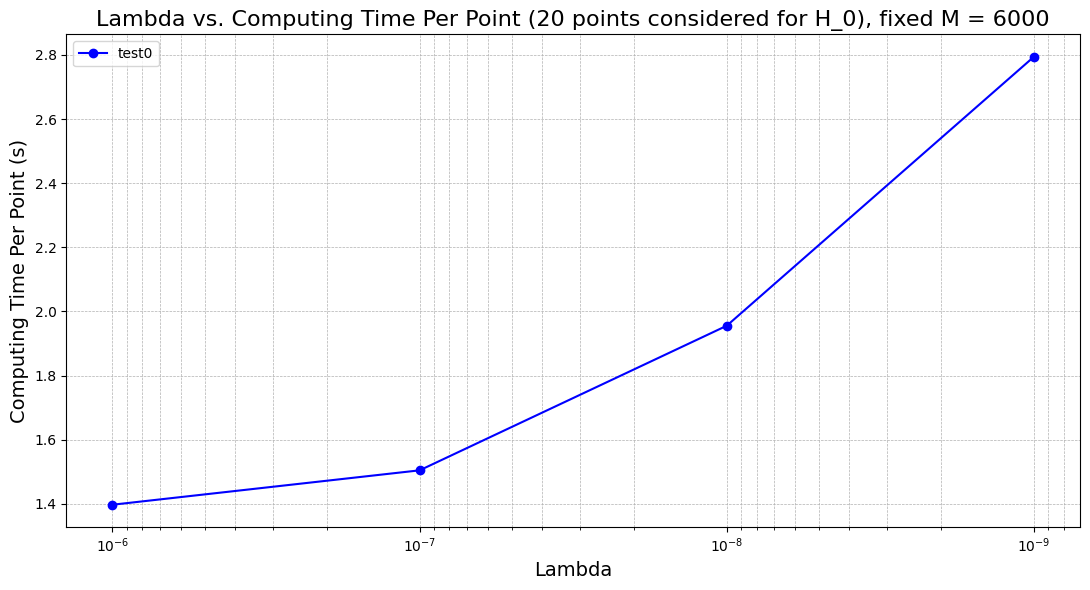

In [43]:
null_hp_times_per_point = {}
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']
color_list = ['b']
label_list = ['test0']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(lam_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xscale('log')  
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"Lambda vs. Computing Time Per Point ({niter} points considered for H_0), fixed M = 6000", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.savefig(null_hypotheses_dir+"Lambda_times_M=6000.pdf", format="pdf")
plt.show()



# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(lam_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xscale('log')  
# plt.xlabel("Lambda", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"Lambda vs. Average Computing Time Per Point ({niter} points considered for H_0) over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.gca().invert_xaxis()

# plt.show()

#test for different sample sizes, add test statistic values, try to test higher M values  

M = 7000

In [44]:
lam_list = [1e-6, 1e-7, 1e-8, 1e-9]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                      progress_bar = True,
                                      verbose = True,
                                      M = 7000, 
                                      lam = lam, 
                                      iter_list = 1000000,
                                      flk_sigma = flk_sigma,
                                      weight = 1)
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")

print(nplm_objects)
    

lam value for NPLMMetric_0 is: 1e-06
lam value for NPLMMetric_1 is: 1e-07
lam value for NPLMMetric_2 is: 1e-08
lam value for NPLMMetric_3 is: 1e-09
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98441f2d50>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97640ac510>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98688164d0>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f9844252f10>}


In [45]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"lambda_times_at_M_7000_{test_name}.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        lam_list = [entry["lambda"] for entry in results]
        lam_list = np.array(lam_list)
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])

        for i in range(len(lam_list)):
            print(f"For test '{test_name}' and lambda = {lam_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(lam_list), niter))
        null_hp_times[test_name] = np.zeros(len(lam_list))  

        for i in range(len(lam_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  
            results.append({"lambda": lam_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/lambda_times_at_M_7000_test0.json already exists. Loading existing results for test0...
For test 'test0' and lambda = 1e-06, the null hypothesis for 20 points has been calculated in 31.177055818028748 s.
For test 'test0' and lambda = 1e-07, the null hypothesis for 20 points has been calculated in 35.56912958994508 s.
For test 'test0' and lambda = 1e-08, the null hypothesis for 20 points has been calculated in 44.50703152292408 s.
For test 'test0' and lambda = 1e-09, the null hypothesis for 20 points has been calculated in 65.38036974705756 s.


[1.55885279 1.77845648 2.22535158 3.26901849]


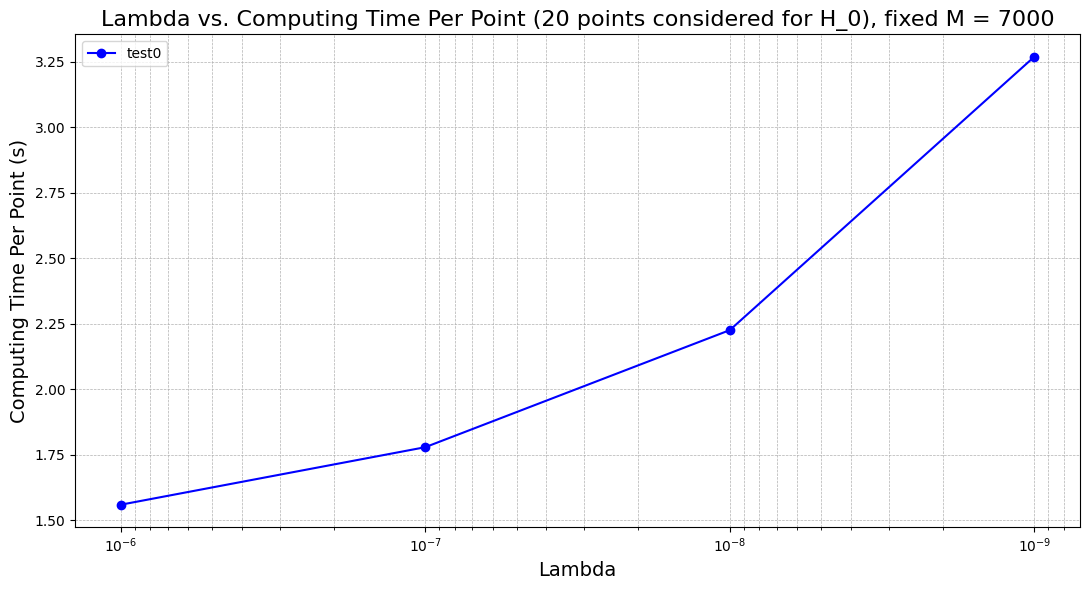

In [46]:
null_hp_times_per_point = {}
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']
color_list = ['b']
label_list = ['test0']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(lam_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xscale('log')  
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"Lambda vs. Computing Time Per Point ({niter} points considered for H_0), fixed M = 7000", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.savefig(null_hypotheses_dir+"Lambda_times_M=7000.pdf", format="pdf")
plt.show()



# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(lam_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xscale('log')  
# plt.xlabel("Lambda", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"Lambda vs. Average Computing Time Per Point ({niter} points considered for H_0) over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.gca().invert_xaxis()

# plt.show()

#test for different sample sizes, add test statistic values, try to test higher M values  

## Check stability of the test statistic for the optimal lambda and varying M around the chosen M

In [47]:
M_list = [4000, 6000, 7000, 9000, 11000]

nplm_objects_for_M = {}

for i, M_value in enumerate(M_list):
    nplm_objects_for_M[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                            progress_bar = True,
                                            verbose = True,
                                            M = M_value, 
                                            lam = 1e-7, 
                                            iter_list = 1000000,
                                            flk_sigma = flk_sigma,
                                            weight = 1)
    print(f"M value for NPLMMetric_{i} is: {nplm_objects_for_M[f'NPLMMetric_{i}'].nplm_kwargs.get('M')}")

print(nplm_objects_for_M)

M value for NPLMMetric_0 is: 4000
M value for NPLMMetric_1 is: 6000
M value for NPLMMetric_2 is: 7000
M value for NPLMMetric_3 is: 9000
M value for NPLMMetric_4 is: 11000
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f9868a020d0>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f97ac234210>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98441eb5d0>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98688481d0>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f98688cfc90>}


In [48]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"test_stat_opt_lambda.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        M_list = [entry["M"] for entry in results]
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])
                
        for i in range(len(M_list)):
            print(f"For test '{test_name}' and M = {M_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(M_list), niter))
        null_hp_times[test_name] = np.zeros(len(M_list))  

        for i in range(len(M_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects_for_M[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects_for_M[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  # Save the time for this lambda
            results.append({"M": M_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/test_stat_opt_lambda.json already exists. Loading existing results for test0...
For test 'test0' and M = 4000, the null hypothesis for 20 points has been calculated in 21.262760866899043 s.
For test 'test0' and M = 6000, the null hypothesis for 20 points has been calculated in 30.115187134128064 s.
For test 'test0' and M = 7000, the null hypothesis for 20 points has been calculated in 34.82025060406886 s.
For test 'test0' and M = 9000, the null hypothesis for 20 points has been calculated in 47.470338304992765 s.
For test 'test0' and M = 11000, the null hypothesis for 20 points has been calculated in 63.13863766612485 s.


Test0 -> Average test statistic value for lambda = 1e-7 varying M: [254.23579982480047, 254.24604158144598, 254.23553435789526, 254.2359673076407, 254.2738479343477]
 with std: [27.792033453474318, 27.78971547420237, 27.78484547244696, 27.778909022623857, 27.77738506736949]


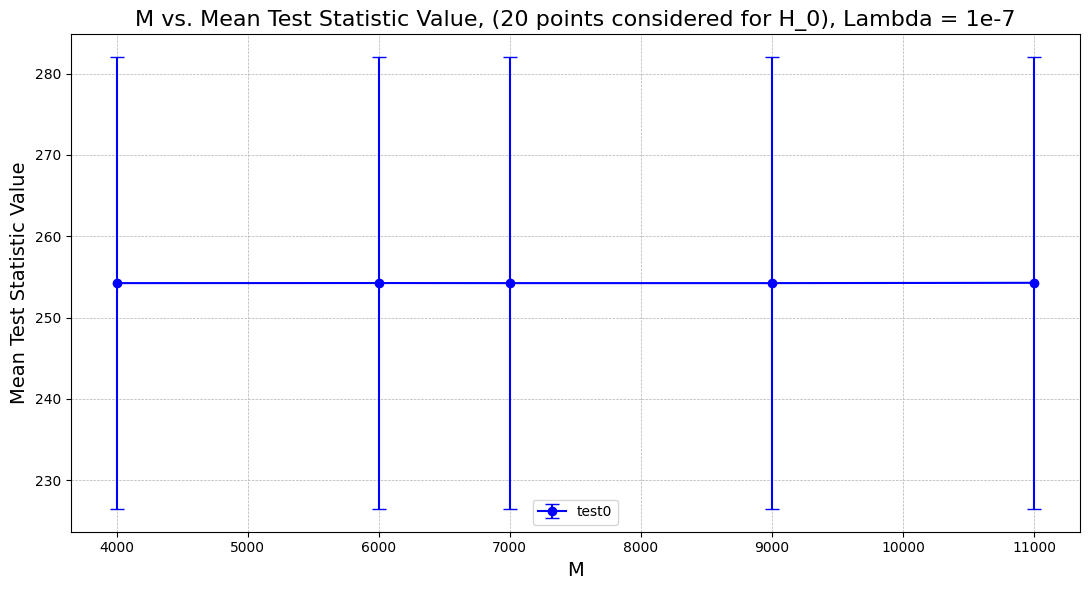

In [49]:
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']

color_list = ['b']
label_list = ['test0']

avg_test_stat = {}
std_test_stat = {}

for test_name in test_names:
    avg_test_stat[test_name] = []
    std_test_stat[test_name] = []
    for i, m in enumerate(M_list):
        avg_test_stat[test_name].append(np.mean(metric_values[test_name][i]))
        std_test_stat[test_name].append(np.std(metric_values[test_name][i]))
    print(f"{test_name.capitalize()} -> Average test statistic value for lambda = 1e-7 varying M: {avg_test_stat[test_name]}\n"
          f" with std: {std_test_stat[test_name]}")

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.errorbar(M_list, avg_test_stat[test_name], std_test_stat[test_name], capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Mean Test Statistic Value", fontsize=14)
plt.title(f"M vs. Mean Test Statistic Value, ({niter} points considered for H_0), Lambda = 1e-7", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"Test_statistic_fluctuations_for_lambda=1e-7.pdf", format="pdf")
plt.show()


# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(M_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xlabel("M", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"M vs. Average Computing Time Per Point ({niter} points considered for H_0) for Lambda = 1e-9 over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.show()


File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/test_stat_opt_lambda.json already exists. Loading existing results for test0...
Test0 -> Average test statistic value for lambda = 1e-7 varying M: [254.23579982480047, 254.24604158144598, 254.23553435789526, 254.2359673076407, 254.2738479343477]
 with std: [27.792033453474318, 27.78971547420237, 27.78484547244696, 27.778909022623857, 27.77738506736949]


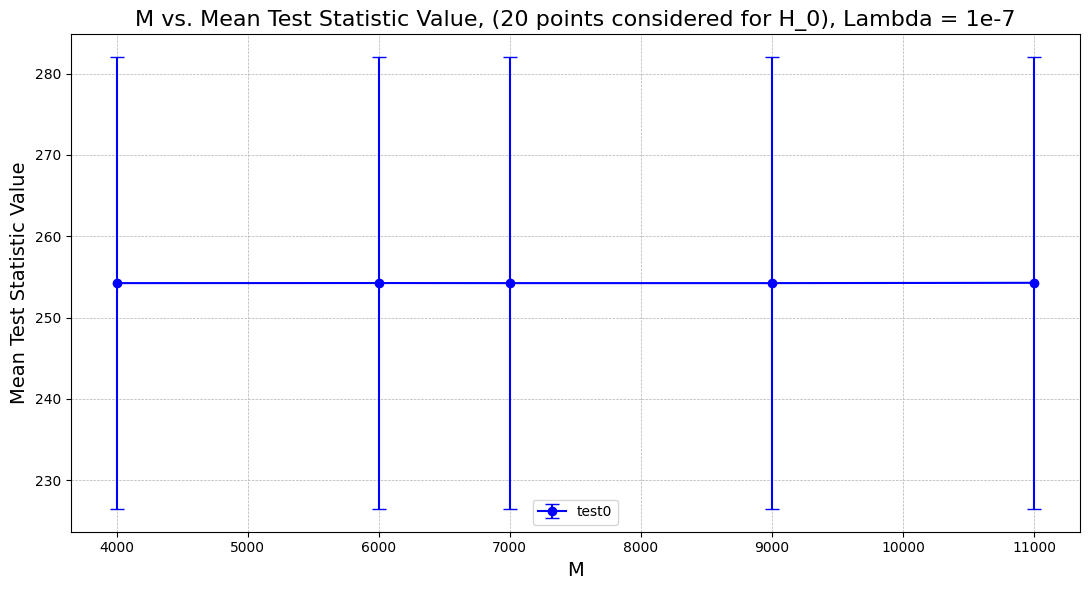

In [10]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"test_stat_opt_lambda.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        M_list = [entry["M"] for entry in results]
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])



color_list = ['b']
label_list = ['test0']

avg_test_stat = {}
std_test_stat = {}

for test_name in test_names:
    avg_test_stat[test_name] = []
    std_test_stat[test_name] = []
    for i, m in enumerate(M_list):
        avg_test_stat[test_name].append(np.mean(metric_values[test_name][i]))
        std_test_stat[test_name].append(np.std(metric_values[test_name][i]))
    print(f"{test_name.capitalize()} -> Average test statistic value for lambda = 1e-7 varying M: {avg_test_stat[test_name]}\n"
          f" with std: {std_test_stat[test_name]}")

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.errorbar(M_list, avg_test_stat[test_name], std_test_stat[test_name], capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Mean Test Statistic Value", fontsize=14)
plt.title(f"M vs. Mean Test Statistic Value, ({niter} points considered for H_0), Lambda = 1e-7", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"Test_statistic_fluctuations_for_lambda=1e-7.pdf", format="pdf")
plt.show()


# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(M_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xlabel("M", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"M vs. Average Computing Time Per Point ({niter} points considered for H_0) for Lambda = 1e-9 over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.show()


## Plot both M and lambda to see test statistic fluctuations 

In [39]:
lam_list = [1e-7, 1e-8, 1e-9]
M_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000]

nplm_objects_M_lam = {}

for i, lam_value in enumerate(lam_list):
    for j, M_value in enumerate(M_list):
        nplm_objects_M_lam[f"NPLMMetric_{i,j}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                                progress_bar = True,
                                                verbose = True,
                                                M = M_value, 
                                                lam = lam_value, 
                                                iter_list = 1000000,
                                                flk_sigma = flk_sigma,
                                                weight = 1)
        print(f"(M,lam) values for NPLMMetric_{i,j} are: ({nplm_objects_M_lam[f'NPLMMetric_{i,j}'].nplm_kwargs.get('M')},{nplm_objects_M_lam[f'NPLMMetric_{i,j}'].nplm_kwargs.get('lam')})")

print(nplm_objects_M_lam)

(M,lam) values for NPLMMetric_(0, 0) are: (1000,1e-07)
(M,lam) values for NPLMMetric_(0, 1) are: (2000,1e-07)
(M,lam) values for NPLMMetric_(0, 2) are: (3000,1e-07)
(M,lam) values for NPLMMetric_(0, 3) are: (4000,1e-07)
(M,lam) values for NPLMMetric_(0, 4) are: (5000,1e-07)
(M,lam) values for NPLMMetric_(0, 5) are: (6000,1e-07)
(M,lam) values for NPLMMetric_(0, 6) are: (7000,1e-07)
(M,lam) values for NPLMMetric_(0, 7) are: (8000,1e-07)
(M,lam) values for NPLMMetric_(0, 8) are: (9000,1e-07)
(M,lam) values for NPLMMetric_(0, 9) are: (10000,1e-07)
(M,lam) values for NPLMMetric_(0, 10) are: (11000,1e-07)
(M,lam) values for NPLMMetric_(1, 0) are: (1000,1e-08)
(M,lam) values for NPLMMetric_(1, 1) are: (2000,1e-08)
(M,lam) values for NPLMMetric_(1, 2) are: (3000,1e-08)
(M,lam) values for NPLMMetric_(1, 3) are: (4000,1e-08)
(M,lam) values for NPLMMetric_(1, 4) are: (5000,1e-08)
(M,lam) values for NPLMMetric_(1, 5) are: (6000,1e-08)
(M,lam) values for NPLMMetric_(1, 6) are: (7000,1e-08)
(M,lam)

In [40]:
name = "nplm"

file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
    
    for i in range(len(lam_list)):       
        for j in range(len(M_list)):
            print(f"For λ={lam_list[i]} and M = {M_list[j]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[i,j]} s.")

else:
    results = []
    metric_values = np.zeros((len(lam_list), len(M_list), niter))
    null_hp_times = np.zeros((len(lam_list), len(M_list)))  

    for i in range(len(lam_list)):
        results.append({"lam": {}})
        
        for j in range(len(M_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects_M_lam[f"NPLMMetric_{i,j}"].Test_np()
            metric_values[i, j] = nplm_objects_M_lam[f"NPLMMetric_{i,j}"].test_statistics_values
            end = timer()
            
            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[i, j] = end - start  
        
            if lam_list[i] not in results[i]["lam"]:
                results[i]["lam"][lam_list[i]] = [] 
            
            # Append the new data for the current M value
            results[i]["lam"][lam_list[i]].append({
                "M": M_list[j],
                "computing_time": null_hp_times[i, j],
                "metric_list": metric_values[i, j].tolist()
            })

    with open(file, "w") as file:
        json.dump(results, file, indent=4)



Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:00<00:10,  1.89it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:01<00:09,  1.82it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:01<00:08,  1.90it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:02<00:08,  1.88it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:02<00:08,  1.86it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:03<00:07,  1.94it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:03<00:06,  1.91it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:04<00:06,  1.94it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:04<00:05,  1.88it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:05<00:05,  1.89it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:05<00:04,  1.93it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:06<00:04,  1.95it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:06<00:03,  1.92it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:07<00:03,  1.89it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:07<00:02,  1.92it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:08<00:02,  1.94it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:08<00:01,  1.91it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:09<00:01,  1.94it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:09<00:00,  1.89it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:10<00:00,  1.90it/s]


Two-sample test calculation completed in 10.510712415911257 seconds.
All done in: 10.52 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:00<00:14,  1.34it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:01<00:13,  1.37it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:02<00:12,  1.34it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:02<00:11,  1.36it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:03<00:10,  1.37it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:04<00:10,  1.38it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:05<00:09,  1.38it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:05<00:08,  1.39it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:06<00:07,  1.42it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:07<00:07,  1.41it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:07<00:06,  1.40it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:08<00:05,  1.40it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:09<00:04,  1.42it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:10<00:04,  1.41it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:10<00:03,  1.41it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:11<00:02,  1.38it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:12<00:02,  1.36it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:13<00:01,  1.37it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:13<00:00,  1.37it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:14<00:00,  1.38it/s]


Two-sample test calculation completed in 14.488031608983874 seconds.
All done in: 14.49 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:00<00:18,  1.00it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:01<00:17,  1.05it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:02<00:15,  1.07it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:03<00:14,  1.07it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:04<00:13,  1.08it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:05<00:12,  1.14it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:06<00:11,  1.09it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:07<00:11,  1.09it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:08<00:10,  1.09it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:09<00:09,  1.09it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:10<00:08,  1.06it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:11<00:07,  1.07it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:12<00:06,  1.08it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:12<00:05,  1.08it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:13<00:04,  1.08it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:14<00:03,  1.08it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:15<00:02,  1.08it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:16<00:01,  1.06it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:17<00:00,  1.04it/s]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


Two-sample test calculation completed in 18.71102426899597 seconds.
All done in: 18.72 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:20,  1.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:02<00:19,  1.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:03<00:18,  1.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:04<00:17,  1.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:05<00:15,  1.06s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:06<00:14,  1.04s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:07<00:13,  1.06s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:08<00:12,  1.04s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:09<00:11,  1.06s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:10<00:10,  1.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:11<00:09,  1.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:12<00:08,  1.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:13<00:07,  1.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:14<00:06,  1.05s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:15<00:05,  1.06s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:17<00:04,  1.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:18<00:03,  1.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:19<00:02,  1.08s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:20<00:01,  1.09s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:21<00:00,  1.07s/it]


Two-sample test calculation completed in 21.452835296746343 seconds.
All done in: 21.46 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:28,  1.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:02<00:23,  1.32s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:04<00:22,  1.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:05<00:21,  1.33s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:06<00:19,  1.30s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:07<00:17,  1.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:09<00:16,  1.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:10<00:15,  1.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:11<00:14,  1.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:12<00:12,  1.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:14<00:11,  1.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:15<00:10,  1.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:16<00:08,  1.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:18<00:07,  1.26s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:19<00:06,  1.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:20<00:04,  1.24s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:21<00:03,  1.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:22<00:02,  1.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:24<00:01,  1.24s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


Two-sample test calculation completed in 25.52572495304048 seconds.
All done in: 25.53 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:34,  1.84s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:03<00:30,  1.67s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:04<00:27,  1.62s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:06<00:25,  1.60s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:07<00:22,  1.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:09<00:20,  1.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:10<00:19,  1.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:12<00:18,  1.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:13<00:16,  1.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:15<00:15,  1.54s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:17<00:13,  1.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:18<00:12,  1.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:20<00:10,  1.55s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:21<00:09,  1.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:23<00:07,  1.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:24<00:05,  1.49s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:26<00:04,  1.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:27<00:03,  1.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:29<00:01,  1.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:30<00:00,  1.54s/it]


Two-sample test calculation completed in 30.826863835100085 seconds.
All done in: 30.83 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:33,  1.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:03<00:31,  1.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:05<00:29,  1.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:07<00:29,  1.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:08<00:26,  1.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:10<00:24,  1.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:12<00:22,  1.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:14<00:21,  1.76s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:15<00:19,  1.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:17<00:17,  1.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:19<00:15,  1.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:21<00:13,  1.74s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:23<00:12,  1.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:24<00:10,  1.78s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:26<00:08,  1.77s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:28<00:07,  1.76s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:30<00:05,  1.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:31<00:03,  1.79s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:33<00:01,  1.78s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:35<00:00,  1.77s/it]


Two-sample test calculation completed in 35.388623585924506 seconds.
All done in: 35.39 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:02<00:42,  2.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:04<00:39,  2.21s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:06<00:35,  2.11s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:08<00:34,  2.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:10<00:31,  2.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:12<00:29,  2.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:15<00:28,  2.16s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:17<00:26,  2.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:19<00:24,  2.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:21<00:21,  2.12s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:23<00:19,  2.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:25<00:17,  2.17s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:28<00:15,  2.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:30<00:12,  2.12s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:32<00:10,  2.15s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:34<00:08,  2.10s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:36<00:06,  2.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:38<00:04,  2.16s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:40<00:02,  2.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:43<00:00,  2.16s/it]


Two-sample test calculation completed in 43.12031494965777 seconds.
All done in: 43.13 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:02<00:50,  2.67s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:05<00:45,  2.51s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:07<00:41,  2.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:10<00:40,  2.53s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:12<00:37,  2.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:14<00:34,  2.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:17<00:31,  2.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:19<00:29,  2.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:22<00:26,  2.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:24<00:24,  2.40s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:27<00:22,  2.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:29<00:19,  2.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:32<00:17,  2.52s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:34<00:14,  2.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:36<00:12,  2.45s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:39<00:09,  2.43s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:41<00:07,  2.42s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:44<00:04,  2.41s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:46<00:02,  2.48s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:49<00:00,  2.46s/it]


Two-sample test calculation completed in 49.13131322013214 seconds.
All done in: 49.14 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:02<00:53,  2.84s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:05<00:50,  2.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:08<00:45,  2.68s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:11<00:43,  2.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:13<00:39,  2.66s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:16<00:38,  2.72s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:19<00:35,  2.75s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:22<00:33,  2.78s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:24<00:30,  2.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:27<00:28,  2.80s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:30<00:25,  2.81s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:33<00:22,  2.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:36<00:19,  2.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:38<00:16,  2.82s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:41<00:14,  2.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:44<00:11,  2.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:47<00:08,  2.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:50<00:05,  2.83s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:53<00:02,  2.93s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:56<00:00,  2.82s/it]


Two-sample test calculation completed in 56.328092333395034 seconds.
All done in: 56.33 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:02<00:56,  2.96s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:06<00:56,  3.17s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:09<00:52,  3.07s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:12<00:50,  3.16s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:15<00:46,  3.09s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:18<00:42,  3.04s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:21<00:40,  3.13s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:25<00:38,  3.19s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:28<00:35,  3.22s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:31<00:32,  3.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:34<00:29,  3.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:38<00:26,  3.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:41<00:23,  3.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:44<00:19,  3.18s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:47<00:16,  3.23s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:51<00:13,  3.25s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:54<00:09,  3.27s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:57<00:06,  3.28s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [01:01<00:03,  3.29s/it]

Iteration 0 - penalty 1.000000e-07 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [01:04<00:00,  3.22s/it]


Two-sample test calculation completed in 64.45267732068896 seconds.
All done in: 64.46 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:00<00:13,  1.37it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:01<00:13,  1.37it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:02<00:12,  1.40it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:02<00:11,  1.41it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:03<00:10,  1.38it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:04<00:09,  1.44it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:04<00:09,  1.43it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:05<00:08,  1.46it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:06<00:07,  1.44it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:06<00:06,  1.47it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:07<00:06,  1.46it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:08<00:05,  1.48it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:09<00:04,  1.47it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:09<00:04,  1.45it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:10<00:03,  1.44it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:11<00:02,  1.45it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:11<00:02,  1.43it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:12<00:01,  1.45it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:13<00:00,  1.42it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Two-sample test calculation completed in 13.915978568140417 seconds.
All done in: 13.92 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:00<00:17,  1.10it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:01<00:16,  1.11it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:02<00:15,  1.09it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:03<00:14,  1.12it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:04<00:13,  1.12it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:05<00:12,  1.12it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:06<00:11,  1.10it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:07<00:10,  1.11it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:08<00:09,  1.13it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:08<00:08,  1.12it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:09<00:08,  1.10it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:10<00:07,  1.11it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:11<00:06,  1.13it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:12<00:05,  1.10it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:13<00:04,  1.09it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:14<00:03,  1.04it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:15<00:02,  1.03it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:16<00:01,  1.06it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:17<00:00,  1.07it/s]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


Two-sample test calculation completed in 18.326715293340385 seconds.
All done in: 18.33 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:21,  1.14s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:02<00:20,  1.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:03<00:19,  1.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:04<00:18,  1.16s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:05<00:17,  1.15s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:06<00:15,  1.12s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:07<00:14,  1.14s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:09<00:13,  1.14s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:10<00:12,  1.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:11<00:11,  1.18s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:12<00:10,  1.18s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:13<00:09,  1.17s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:14<00:08,  1.15s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:16<00:06,  1.15s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:17<00:05,  1.16s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:18<00:04,  1.15s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:19<00:03,  1.19s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:20<00:02,  1.17s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:22<00:01,  1.20s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


Two-sample test calculation completed in 23.262243766803294 seconds.
All done in: 23.27 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:26,  1.40s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:02<00:26,  1.45s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:04<00:24,  1.41s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:05<00:23,  1.48s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:07<00:21,  1.44s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:08<00:19,  1.39s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:09<00:18,  1.42s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:11<00:16,  1.38s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:12<00:15,  1.38s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:14<00:14,  1.41s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:15<00:12,  1.40s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:16<00:10,  1.37s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:18<00:09,  1.43s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:19<00:08,  1.41s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:21<00:07,  1.44s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:22<00:05,  1.42s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:24<00:04,  1.46s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:25<00:02,  1.47s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:27<00:01,  1.47s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


Two-sample test calculation completed in 28.506378770805895 seconds.
All done in: 28.51 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:32,  1.72s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:03<00:30,  1.71s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:05<00:29,  1.71s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:06<00:27,  1.71s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:08<00:25,  1.71s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:10<00:22,  1.63s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:11<00:21,  1.66s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:13<00:19,  1.59s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:14<00:17,  1.63s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:16<00:16,  1.66s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:18<00:15,  1.67s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:19<00:12,  1.61s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:21<00:11,  1.68s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:23<00:10,  1.69s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:25<00:08,  1.70s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:26<00:06,  1.70s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:28<00:05,  1.78s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:30<00:03,  1.76s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:32<00:01,  1.75s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:33<00:00,  1.70s/it]


Two-sample test calculation completed in 33.917137779295444 seconds.
All done in: 33.92 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:35,  1.89s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:03<00:33,  1.88s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:05<00:30,  1.81s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:07<00:31,  1.96s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:09<00:28,  1.93s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:11<00:26,  1.86s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:13<00:24,  1.86s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:15<00:22,  1.87s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:16<00:20,  1.87s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:19<00:20,  2.02s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:21<00:17,  1.98s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:23<00:15,  1.95s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:25<00:14,  2.03s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:27<00:11,  1.97s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:28<00:09,  1.94s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:30<00:07,  1.92s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:33<00:06,  2.05s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:35<00:04,  2.10s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:37<00:02,  2.03s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:39<00:00,  1.96s/it]


Two-sample test calculation completed in 39.13379705417901 seconds.
All done in: 39.14 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:02<00:40,  2.14s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:04<00:38,  2.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:06<00:36,  2.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:08<00:35,  2.21s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:10<00:31,  2.11s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:12<00:29,  2.12s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:14<00:27,  2.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:17<00:25,  2.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:19<00:23,  2.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:21<00:21,  2.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:23<00:19,  2.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:25<00:17,  2.13s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:28<00:16,  2.31s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:30<00:13,  2.25s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:32<00:11,  2.22s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:34<00:08,  2.19s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:37<00:07,  2.35s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:39<00:04,  2.35s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:42<00:02,  2.34s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:44<00:00,  2.21s/it]


Two-sample test calculation completed in 44.193474246189 seconds.
All done in: 44.20 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:02<00:46,  2.46s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:04<00:44,  2.45s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:07<00:41,  2.45s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:10<00:40,  2.54s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:12<00:37,  2.50s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:14<00:34,  2.48s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:17<00:32,  2.47s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:20<00:30,  2.54s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:22<00:28,  2.58s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:25<00:26,  2.62s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:27<00:23,  2.57s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:30<00:20,  2.53s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:32<00:18,  2.57s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:35<00:15,  2.61s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:38<00:12,  2.56s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:40<00:10,  2.60s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:43<00:08,  2.69s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:46<00:05,  2.69s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:49<00:02,  2.69s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:51<00:00,  2.58s/it]


Two-sample test calculation completed in 51.545902697369456 seconds.
All done in: 51.55 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:02<00:56,  2.96s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:05<00:53,  2.95s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:08<00:47,  2.82s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:11<00:45,  2.87s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:14<00:41,  2.80s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:17<00:39,  2.85s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:20<00:37,  2.88s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:23<00:34,  2.90s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:25<00:32,  2.91s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:28<00:29,  2.92s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:31<00:26,  2.93s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:34<00:23,  2.94s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:38<00:21,  3.02s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:41<00:18,  3.08s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:44<00:15,  3.04s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:47<00:12,  3.01s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:50<00:09,  3.07s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:53<00:06,  3.12s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:56<00:03,  3.15s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:59<00:00,  2.99s/it]


Two-sample test calculation completed in 59.70166650367901 seconds.
All done in: 59.71 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:03<01:00,  3.17s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:06<01:00,  3.35s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:09<00:55,  3.26s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:13<00:53,  3.34s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:16<00:50,  3.39s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:20<00:47,  3.42s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:23<00:43,  3.33s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:26<00:40,  3.38s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:30<00:37,  3.41s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:33<00:34,  3.43s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:37<00:31,  3.45s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:40<00:27,  3.45s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:44<00:24,  3.46s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:47<00:21,  3.56s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:51<00:17,  3.43s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:54<00:13,  3.44s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:58<00:10,  3.55s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [01:01<00:07,  3.53s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [01:05<00:03,  3.51s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [01:08<00:00,  3.43s/it]


Two-sample test calculation completed in 68.52736529614776 seconds.
All done in: 68.53 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:03<01:10,  3.69s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:07<01:10,  3.90s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:11<01:04,  3.80s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:15<01:02,  3.90s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:19<00:57,  3.82s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:22<00:52,  3.78s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:26<00:48,  3.75s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:30<00:44,  3.73s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:34<00:42,  3.83s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:38<00:38,  3.90s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:42<00:34,  3.83s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:46<00:32,  4.01s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:50<00:28,  4.02s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:54<00:24,  4.03s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:58<00:19,  3.92s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [01:02<00:15,  3.98s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [01:06<00:12,  4.01s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [01:10<00:08,  4.02s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [01:14<00:04,  4.03s/it]

Iteration 0 - penalty 1.000000e-08 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [01:18<00:00,  3.91s/it]


Two-sample test calculation completed in 78.171334145125 seconds.
All done in: 78.18 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:21,  1.14s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:02<00:22,  1.26s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:03<00:19,  1.16s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:04<00:18,  1.14s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:05<00:17,  1.15s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:06<00:14,  1.07s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:07<00:14,  1.09s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:08<00:12,  1.05s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:09<00:11,  1.06s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:11<00:10,  1.08s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:12<00:09,  1.09s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:13<00:08,  1.05s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:14<00:07,  1.06s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:15<00:06,  1.06s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:16<00:05,  1.06s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:17<00:04,  1.07s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:18<00:03,  1.09s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:19<00:02,  1.08s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:20<00:01,  1.08s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:21<00:00,  1.08s/it]


Two-sample test calculation completed in 21.693626096006483 seconds.
All done in: 21.70 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:24,  1.30s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:02<00:24,  1.35s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:04<00:23,  1.36s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:05<00:20,  1.30s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:06<00:19,  1.28s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:07<00:18,  1.33s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:09<00:17,  1.32s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:10<00:16,  1.34s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:11<00:14,  1.30s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:13<00:13,  1.32s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:14<00:11,  1.30s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:15<00:10,  1.27s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:16<00:08,  1.26s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:18<00:08,  1.38s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:19<00:06,  1.37s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:21<00:05,  1.45s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:22<00:04,  1.44s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:24<00:02,  1.45s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:25<00:01,  1.40s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:27<00:00,  1.35s/it]


Two-sample test calculation completed in 27.05783950863406 seconds.
All done in: 27.06 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:28,  1.48s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:03<00:27,  1.51s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:04<00:25,  1.50s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:06<00:25,  1.62s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:07<00:23,  1.59s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:09<00:21,  1.55s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:11<00:20,  1.59s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:12<00:18,  1.56s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:13<00:16,  1.53s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:15<00:16,  1.66s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:17<00:15,  1.69s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:19<00:12,  1.62s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:20<00:11,  1.64s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:22<00:09,  1.59s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:24<00:08,  1.68s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:25<00:06,  1.62s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:27<00:05,  1.72s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:29<00:03,  1.71s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:31<00:01,  1.74s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:32<00:00,  1.64s/it]


Two-sample test calculation completed in 32.844024322927 seconds.
All done in: 32.85 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:01<00:35,  1.86s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:03<00:34,  1.91s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:05<00:31,  1.84s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:08<00:33,  2.07s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:09<00:29,  1.96s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:11<00:26,  1.89s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:13<00:24,  1.88s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:15<00:21,  1.81s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:16<00:20,  1.83s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:19<00:19,  1.92s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:20<00:17,  1.93s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:22<00:15,  1.88s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:24<00:13,  1.96s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:26<00:11,  1.99s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:28<00:09,  1.96s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:30<00:07,  1.93s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:33<00:06,  2.05s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:34<00:03,  2.00s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:36<00:01,  1.98s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]


Two-sample test calculation completed in 38.72930164402351 seconds.
All done in: 38.73 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:02<00:42,  2.23s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:04<00:40,  2.23s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:06<00:36,  2.18s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:09<00:36,  2.29s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:11<00:33,  2.22s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:13<00:31,  2.26s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:15<00:29,  2.24s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:17<00:26,  2.23s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:20<00:24,  2.23s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:22<00:23,  2.34s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:25<00:21,  2.35s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:27<00:19,  2.39s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:30<00:16,  2.42s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:32<00:14,  2.44s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:34<00:11,  2.37s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:37<00:09,  2.40s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:40<00:07,  2.53s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:42<00:05,  2.55s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:44<00:02,  2.49s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:47<00:00,  2.37s/it]


Two-sample test calculation completed in 47.33391048433259 seconds.
All done in: 47.34 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:02<00:51,  2.69s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:05<00:48,  2.69s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:07<00:44,  2.62s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:10<00:44,  2.77s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:13<00:40,  2.68s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:16<00:37,  2.68s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:18<00:34,  2.62s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:21<00:31,  2.65s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:23<00:29,  2.65s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:27<00:29,  2.96s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:30<00:25,  2.88s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:33<00:23,  2.92s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:36<00:20,  2.95s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:39<00:17,  2.87s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:41<00:14,  2.81s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:44<00:11,  2.82s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:47<00:08,  2.96s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:50<00:05,  2.97s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [00:53<00:02,  2.98s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [00:56<00:00,  2.83s/it]


Two-sample test calculation completed in 56.5280364821665 seconds.
All done in: 56.53 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:03<00:59,  3.15s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:06<00:56,  3.13s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:09<00:51,  3.03s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:12<00:51,  3.21s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:15<00:46,  3.10s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:18<00:44,  3.17s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:21<00:40,  3.09s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:24<00:37,  3.10s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:28<00:34,  3.10s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:31<00:32,  3.22s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:34<00:28,  3.18s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:38<00:26,  3.28s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:41<00:23,  3.29s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:44<00:19,  3.23s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:47<00:15,  3.19s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:50<00:12,  3.23s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [00:54<00:10,  3.43s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [00:58<00:07,  3.51s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [01:02<00:03,  3.55s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [01:05<00:00,  3.25s/it]


Two-sample test calculation completed in 65.0838832538575 seconds.
All done in: 65.09 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:03<01:08,  3.62s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:07<01:05,  3.63s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:10<00:59,  3.52s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:14<00:58,  3.66s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:17<00:53,  3.57s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:21<00:51,  3.66s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:25<00:47,  3.65s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:28<00:43,  3.63s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:32<00:39,  3.64s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:36<00:37,  3.71s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:40<00:33,  3.68s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:44<00:30,  3.81s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:48<00:26,  3.82s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [00:52<00:23,  3.90s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [00:55<00:19,  3.81s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [00:59<00:15,  3.82s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [01:03<00:11,  3.91s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [01:07<00:07,  3.97s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [01:11<00:03,  3.93s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [01:15<00:00,  3.77s/it]


Two-sample test calculation completed in 75.30684063863009 seconds.
All done in: 75.31 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:04<01:22,  4.34s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:08<01:18,  4.33s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:12<01:11,  4.21s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:17<01:08,  4.26s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:20<00:59,  4.00s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:25<00:58,  4.21s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:29<00:53,  4.15s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:33<00:50,  4.21s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:37<00:46,  4.25s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:42<00:43,  4.36s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:46<00:38,  4.27s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:51<00:35,  4.38s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [00:55<00:30,  4.36s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [01:00<00:27,  4.52s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [01:04<00:21,  4.38s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [01:09<00:17,  4.45s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [01:14<00:13,  4.59s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [01:18<00:09,  4.60s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [01:23<00:04,  4.61s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [01:27<00:00,  4.37s/it]


Two-sample test calculation completed in 87.30945970118046 seconds.
All done in: 87.31 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:04<01:30,  4.77s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:09<01:25,  4.77s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:13<01:16,  4.49s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:18<01:15,  4.72s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:23<01:12,  4.85s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:28<01:07,  4.82s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:33<01:02,  4.81s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:38<00:57,  4.80s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:43<00:53,  4.88s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:48<00:49,  4.95s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [00:53<00:44,  4.89s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [00:58<00:39,  4.96s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [01:02<00:34,  4.91s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [01:08<00:30,  5.06s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [01:13<00:24,  4.97s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [01:18<00:20,  5.00s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [01:23<00:15,  5.12s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [01:28<00:10,  5.12s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [01:33<00:05,  5.11s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [01:37<00:00,  4.90s/it]


Two-sample test calculation completed in 97.95639856019989 seconds.
All done in: 97.96 s.
Computing and saving nplm

------------------------------------------
Starting nplm metric calculation...
niter = 20
batch_size = 50000


Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Running numpy NPLM calculation...
Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:   5%|▌         | 1/20 [00:04<01:31,  4.81s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  10%|█         | 2/20 [00:11<01:42,  5.68s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  15%|█▌        | 3/20 [00:15<01:29,  5.28s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  20%|██        | 4/20 [00:21<01:26,  5.39s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  25%|██▌       | 5/20 [00:27<01:21,  5.44s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  30%|███       | 6/20 [00:32<01:16,  5.47s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  35%|███▌      | 7/20 [00:38<01:11,  5.50s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  40%|████      | 8/20 [00:43<01:06,  5.51s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  45%|████▌     | 9/20 [00:49<01:02,  5.64s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  50%|█████     | 10/20 [00:55<00:57,  5.73s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  55%|█████▌    | 11/20 [01:00<00:49,  5.45s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  60%|██████    | 12/20 [01:06<00:44,  5.61s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  65%|██████▌   | 13/20 [01:11<00:39,  5.60s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  70%|███████   | 14/20 [01:18<00:34,  5.80s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  75%|███████▌  | 15/20 [01:22<00:27,  5.50s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  80%|████████  | 16/20 [01:28<00:22,  5.63s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  85%|████████▌ | 17/20 [01:35<00:17,  5.82s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  90%|█████████ | 18/20 [01:41<00:11,  5.85s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations:  95%|█████████▌| 19/20 [01:46<00:05,  5.86s/it]

Iteration 0 - penalty 1.000000e-09 - sub-iterations 1000000


Iterations: 100%|██████████| 20/20 [01:51<00:00,  5.59s/it]

Two-sample test calculation completed in 111.70962920086458 seconds.
All done in: 111.71 s.


File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/test_statistic_fluc_M_lam.json already exists. Loading existing results.
Average test statistic values for lambda = 1e-07 varying M: [254.10582764 254.19841732 254.21472334 254.23579982 254.23400954
 254.24604158 254.23553436 254.24086089 254.23596731 254.25864378
 254.27384793]
 with std: [27.78452277 27.79045243 27.78945012 27.79203345 27.78687712 27.78971547
 27.78484547 27.78743816 27.77890902 27.78166243 27.77738507]
Average test statistic values for lambda = 1e-08 varying M: [389.39850226 390.03068021 390.15785553 390.21094492 390.24770724
 390.27464166 390.28382468 390.2945376  390.31037741 390.33584887
 390.36123238]
 with std: [40.76056586 40.73597997 40.72188479 40.72892192 40.71859409 40.7156335
 40.71785028 40.7130098  40.72669325 40.71735212 40.73546871]
Average test statistic values for lambda = 1e-09 varying M: [578.41387466 582.25995646 583.04915559 583.33967212 583.51443848
 583.63887538 583.68976917 583.74547921 

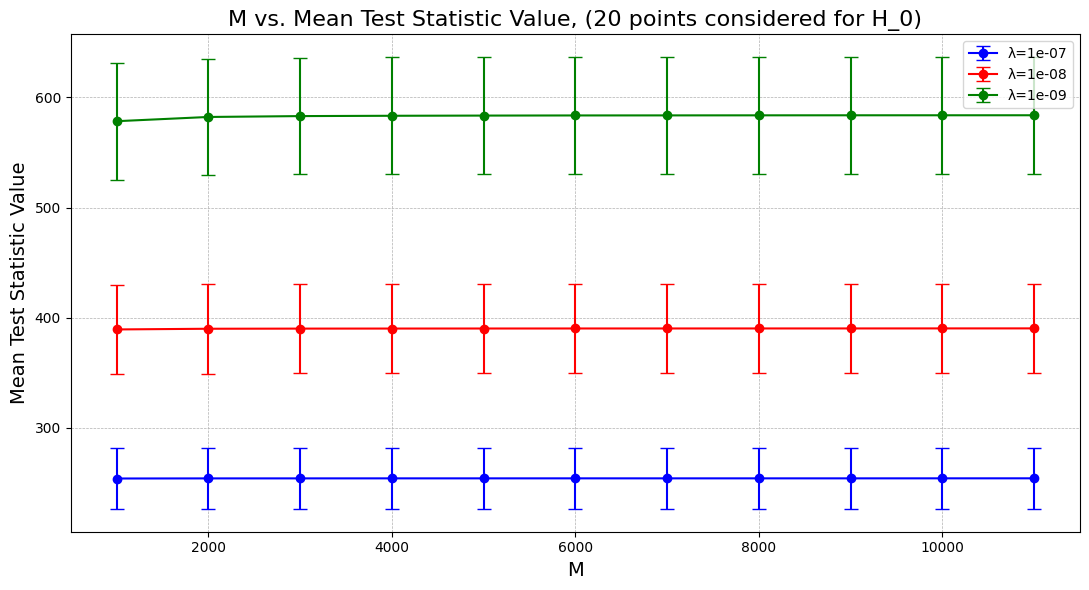

In [41]:
file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    lam_list = np.array(lam_list)
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
                null_hp_times = np.array(null_hp_times)
                metric_values = np.array(metric_values)
                
else:
    print("file does not exist")
    

color_list = ['b','r','g']
label_list = [f'λ={lam}' for lam in lam_list]

avg_test_stat = np.zeros((len(lam_list), len(M_list)))
std_test_stat = np.zeros((len(lam_list), len(M_list)))

for i, lam in enumerate(lam_list):
    for j, m in enumerate(M_list):
        avg_test_stat[i,j] = (np.mean(metric_values[i,j]))
        std_test_stat[i,j] = (np.std(metric_values[i,j]))
    print(f"Average test statistic values for lambda = {lam} varying M: {avg_test_stat[i]}\n"
          f" with std: {std_test_stat[i]}")

plt.figure(figsize=(11, 6))
for i in range(len(lam_list)):
    plt.errorbar(M_list, avg_test_stat[i], std_test_stat[i], capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Mean Test Statistic Value", fontsize=14)
plt.title(f"M vs. Mean Test Statistic Value, ({niter} points considered for H_0)", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"Test_statistic_fluc_vs_M.pdf", format="pdf")
plt.show()
